In [1]:
import numpy as np
import math
from math import sqrt
import pandas as pd
import sklearn
from matplotlib import pyplot
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from numpy import concatenate
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping

In [2]:
#one-hot-encoding: 0 ve 1 atar ve dummy yaratır 44 sütun ekler.
#label encoing: 1-2-3-4 şeklinde tek bir sütunla ülke çiftlerini ayırır. 

In [3]:
dff = pd.read_csv("data/export_data_all.csv")
df = dff.copy()
df.head()

,Export,Import,Year,Export_Value,Export_Value_(t-1),GDP_i(t-1),GDP_j(t-1),GDPPC_i(t-1),GDPPC_j(t-1),D_ij,FTA_1,FTA_2
0,Iceland,China,2000,11191.652,5022.337,8.982048e+09,1.093997e+12,32381.625236,873.287062,7861.07,0,1
1,Iceland,France,2000,87202.089,104187.632,8.982048e+09,1.492648e+12,32381.625236,24673.203048,2372.32,0,1
2,Iceland,Germany,2000,312116.389,262963.856,8.982048e+09,2.194204e+12,32381.625236,26725.915218,2246.80,0,1
3,Iceland,Italy,2000,27966.976,34470.260,8.982048e+09,1.252024e+12,32381.625236,21997.624316,3138.62,0,1
4,Iceland,Netherlands,2000,147015.380,120782.848,8.982048e+09,4.468986e+11,32381.625236,28263.096711,1932.09,0,1


Since the Export and Import columns are categorical, to use these variables in the model, it is necessary to convert them into numerical values. The term one hot encoding means that categorical variables are represented as binary form such as 0s and 1s.  
In order to apply one-hot encoding, 44 country pairs is created by combining the names of importing and exporting countries. After this process, Export and Import columns are dropped.

In [4]:
df["CountryPairs"] = df["Export"] + df["Import"]
df.drop(["Export", "Import"], axis=1, inplace=True)
df.head()

,Year,Export_Value,Export_Value_(t-1),GDP_i(t-1),GDP_j(t-1),GDPPC_i(t-1),GDPPC_j(t-1),D_ij,FTA_1,FTA_2,CountryPairs
0,2000,11191.652,5022.337,8.982048e+09,1.093997e+12,32381.625236,873.287062,7861.07,0,1,IcelandChina
1,2000,87202.089,104187.632,8.982048e+09,1.492648e+12,32381.625236,24673.203048,2372.32,0,1,IcelandFrance
2,2000,312116.389,262963.856,8.982048e+09,2.194204e+12,32381.625236,26725.915218,2246.80,0,1,IcelandGermany
3,2000,27966.976,34470.260,8.982048e+09,1.252024e+12,32381.625236,21997.624316,3138.62,0,1,IcelandItaly
4,2000,147015.380,120782.848,8.982048e+09,4.468986e+11,32381.625236,28263.096711,1932.09,0,1,IcelandNetherlands


After this process, with using get_dummies function from pandas library, these variables turn into one hot encoding form.  

In [5]:
df = pd.get_dummies(df, drop_first=True) # , drop_first=True
df.head()

,Year,Export_Value,Export_Value_(t-1),GDP_i(t-1),GDP_j(t-1),GDPPC_i(t-1),GDPPC_j(t-1),D_ij,FTA_1,FTA_2,...,CountryPairs_TurkeyFrance,CountryPairs_TurkeyGermany,CountryPairs_TurkeyIceland,CountryPairs_TurkeyItaly,CountryPairs_TurkeyNetherlands,CountryPairs_TurkeyNorway,CountryPairs_TurkeySpain,CountryPairs_TurkeySwitzerland,CountryPairs_TurkeyUnited Kingdom,CountryPairs_TurkeyUnited States
0,2000,11191.652,5022.337,8.982048e+09,1.093997e+12,32381.625236,873.287062,7861.07,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2000,87202.089,104187.632,8.982048e+09,1.492648e+12,32381.625236,24673.203048,2372.32,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2000,312116.389,262963.856,8.982048e+09,2.194204e+12,32381.625236,26725.915218,2246.80,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2000,27966.976,34470.260,8.982048e+09,1.252024e+12,32381.625236,21997.624316,3138.62,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2000,147015.380,120782.848,8.982048e+09,4.468986e+11,32381.625236,28263.096711,1932.09,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.iloc[:,10:].head()

,CountryPairs_IcelandFrance,CountryPairs_IcelandGermany,CountryPairs_IcelandItaly,CountryPairs_IcelandNetherlands,CountryPairs_IcelandNorway,CountryPairs_IcelandSpain,CountryPairs_IcelandSwitzerland,CountryPairs_IcelandTurkey,CountryPairs_IcelandUnited Kingdom,CountryPairs_IcelandUnited States,...,CountryPairs_TurkeyFrance,CountryPairs_TurkeyGermany,CountryPairs_TurkeyIceland,CountryPairs_TurkeyItaly,CountryPairs_TurkeyNetherlands,CountryPairs_TurkeyNorway,CountryPairs_TurkeySpain,CountryPairs_TurkeySwitzerland,CountryPairs_TurkeyUnited Kingdom,CountryPairs_TurkeyUnited States
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
columns = ['Export_Value', 'Export_Value_(t-1)', 'GDP_i(t-1)', 'GDP_j(t-1)','GDPPC_i(t-1)', 'GDPPC_j(t-1)', 'D_ij']
df[columns] = df[columns].apply(lambda x: np.log(x))
df["Year"] = df["Year"] - 2000

In [8]:
#min max scalerı y değerleri ve x değerleri için ayrı ayrı uyguladık.
min_max_scaler_y = preprocessing.MinMaxScaler()
df['Export_Value']= min_max_scaler_y.fit_transform(pd.DataFrame(df['Export_Value'])) #y değerleri için minmax
                                                           #İki boyutlu istediği için data frame çevirip atadık.     
columns_mms=['Export_Value_(t-1)', 'GDP_i(t-1)', 'GDP_j(t-1)','GDPPC_i(t-1)', 'GDPPC_j(t-1)', 'D_ij']
min_max_scaler_x = preprocessing.MinMaxScaler()
df[columns_mms] = min_max_scaler_x.fit_transform(df[columns_mms])  #features için minmax

In [9]:
y = df['Export_Value']
X = df.drop('Export_Value',axis=1)

In [10]:
x_values = X.values
y_values = y.values

In [11]:
train_row = 748 # 2000-2016
val = 836 # 2017-2018

train_X = x_values[:train_row, :]
validation_X = x_values[train_row:val, :]
test_X = x_values[val:, :]

train_y = y_values[:train_row]
validation_y = y_values[train_row:val]
test_y = y_values[val:]

In [12]:
timesteps=1
train_X = train_X.reshape((train_X.shape[0]//timesteps, timesteps, train_X.shape[1]))
validation_X = validation_X.reshape((validation_X.shape[0]//timesteps, timesteps, validation_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0]//timesteps, timesteps, test_X.shape[1]))

train_y = train_y.reshape((train_y.shape[0]//timesteps, timesteps,))
validation_y = validation_y.reshape((validation_y.shape[0]//timesteps, timesteps,))
test_y =  test_y.reshape((test_y.shape[0]//timesteps, timesteps,))

print(train_X.shape, train_y.shape, validation_X.shape, validation_y.shape, test_X.shape, test_y.shape)

(748, 1, 52) (748, 1) (88, 1, 52) (88, 1) (44, 1, 52) (44, 1)


In [13]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [14]:
model = Sequential()
model.add(LSTM(10, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(train_X, train_y, epochs=30, batch_size=None, validation_data=(validation_X, validation_y), verbose=2, shuffle=False, callbacks=[es])

Epoch 1/30
24/24 - 2s - loss: 0.5633 - val_loss: 0.4386 - 2s/epoch - 86ms/step
Epoch 2/30
24/24 - 0s - loss: 0.2319 - val_loss: 0.1393 - 73ms/epoch - 3ms/step
Epoch 3/30
24/24 - 0s - loss: 0.0938 - val_loss: 0.0341 - 69ms/epoch - 3ms/step
Epoch 4/30
24/24 - 0s - loss: 0.0513 - val_loss: 0.0250 - 76ms/epoch - 3ms/step
Epoch 5/30
24/24 - 0s - loss: 0.0379 - val_loss: 0.0228 - 71ms/epoch - 3ms/step
Epoch 6/30
24/24 - 0s - loss: 0.0300 - val_loss: 0.0186 - 77ms/epoch - 3ms/step
Epoch 7/30
24/24 - 0s - loss: 0.0241 - val_loss: 0.0160 - 70ms/epoch - 3ms/step
Epoch 8/30
24/24 - 0s - loss: 0.0195 - val_loss: 0.0143 - 106ms/epoch - 4ms/step
Epoch 9/30
24/24 - 0s - loss: 0.0158 - val_loss: 0.0131 - 84ms/epoch - 3ms/step
Epoch 10/30
24/24 - 0s - loss: 0.0129 - val_loss: 0.0122 - 56ms/epoch - 2ms/step
Epoch 11/30
24/24 - 0s - loss: 0.0107 - val_loss: 0.0113 - 74ms/epoch - 3ms/step
Epoch 12/30
24/24 - 0s - loss: 0.0089 - val_loss: 0.0103 - 70ms/epoch - 3ms/step
Epoch 13/30
24/24 - 0s - loss: 0.0075

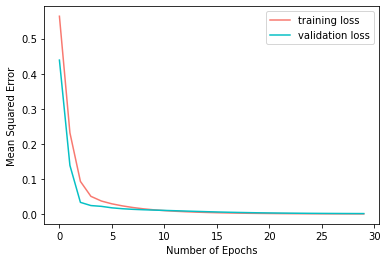

In [15]:
pyplot.plot(history.history['loss'], label='training loss', color='#f87970')
pyplot.plot(history.history['val_loss'], label='validation loss', color='#06c0c5')
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Mean Squared Error")
pyplot.show()

In [16]:
# make a prediction
yhat = model.predict(test_X)
inv_yhat  = min_max_scaler_y.inverse_transform(yhat) 
test_y = test_y.reshape((len(test_y)*timesteps, 1))
inv_y = min_max_scaler_y.inverse_transform(test_y) 
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.603


In [17]:
inv_yhat = pd.DataFrame(inv_yhat)
inv_y = pd.DataFrame(inv_y)
inv_yhat_y = pd.concat((inv_yhat, inv_y),axis=1)
inv_yhat_y.columns = ["Prediction","2019_Values"]
countries_df = dff[["Export","Import"]].iloc[:44]
prediction_data = pd.concat((countries_df, inv_yhat_y),axis=1)
prediction_data

,Export,Import,Prediction,2019_Values
0,Iceland,China,12.944842,11.773858
1,Iceland,France,12.140489,12.821405
2,Iceland,Germany,13.307455,12.642021
3,Iceland,Italy,11.217206,10.430927
4,Iceland,Netherlands,14.114730,14.133159
5,Iceland,Norway,12.198359,12.215879
6,Iceland,Spain,12.833132,13.113035
7,Iceland,Switzerland,11.379944,9.765879
8,Iceland,Turkey,9.681818,9.908276
9,Iceland,United Kingdom,13.684092,13.206026
